In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Set up paths
data_folder = r'taxi_log_2008_by_id'
full_path = os.path.join(os.getcwd(), data_folder)

In [4]:
print(f"Reading data from {full_path}")

Reading data from c:\Users\atomi\Documents\Big Data\tax_project_group_A6\data\release\taxi_log_2008_by_id


In [5]:
# Read all taxi files
all_files = [os.path.join(full_path, f) for f in os.listdir(full_path) if f.endswith('.txt')]
df_list = []
for file in all_files:
    temp = pd.read_csv(file, header=None, names=['taxiId', 'timestamp', 'longitude', 'latitude'])
    df_list.append(temp)
df = pd.concat(df_list, ignore_index=True)

# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

C:\Users\atomi\AppData\Local\Temp\ipykernel_8040\3080250191.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [6]:
df_list[0]

,taxiId,timestamp,longitude,latitude
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248
...,...,...,...,...
583,1,2008-02-08 15:11:31,116.48347,39.91954
584,1,2008-02-08 15:21:31,116.50789,39.93128
585,1,2008-02-08 15:31:31,116.53174,39.91536
586,1,2008-02-08 15:41:31,116.57156,39.90263


In [7]:
#count the number of taxis
df['taxiId'] = df['taxiId'].astype('category')
print(f"Number of taxis: {df['taxiId'].nunique()}")
#
df_list_missing_values = []
#for each taxi (df), count the number of missing values and store in a df_missing_values
for i in range(len(df_list)):
    df_list_missing_values.append(df_list[i].isnull().sum())
    #print(f"Missing values for taxi {i}: {df_list_missing_values[i]}")


#count the number of rows for each taxi
df_list_count = []
#for each taxi (df), count the number of rows and store in a df_count
for i in range(len(df_list)):
    df_list_count.append(df_list[i].count())
    #print(f"Number of rows for taxi {i}: {df_list_count[i]}") 


#print df_list_count and df_list_missing_values
df_list_count = pd.DataFrame(df_list_count)
df_list_missing_values = pd.DataFrame(df_list_missing_values)

print(df_list_count)
print(df_list_missing_values)

#for each 

#save df_list_count to csv
#save df_list_missing_values to csv#
df_list_count.to_csv('df_list_count.csv', index=False)
df_list_missing_values.to_csv('df_list_missing_values.csv', index=False)

Number of taxis: 10336
       taxiId  timestamp  longitude  latitude
0         588        588        588       588
1        5617       5617       5617      5617
2        1323       1323       1323      1323
3        1779       1779       1779      1779
4        1623       1623       1623      1623
...       ...        ...        ...       ...
10352     976        976        976       976
10353    1711       1711       1711      1711
10354    3355       3355       3355      3355
10355    1068       1068       1068      1068
10356    1654       1654       1654      1654

[10357 rows x 4 columns]
       taxiId  timestamp  longitude  latitude
0           0          0          0         0
1           0          0          0         0
2           0          0          0         0
3           0          0          0         0
4           0          0          0         0
...       ...        ...        ...       ...
10352       0          0          0         0
10353       0          0       

In [8]:
#print first row of df_list_count#
incomplete_columns = []
df_list_count.head(1)
#for each row in df_list_count, check that each column contains the same value else save column to incomplete_columns
#row in df_list_count, check that each column contains the same value else save column to incomplete_columns
for i in range(len(df_list_count)):
    for j in range(len(df_list_count.columns)):
        if df_list_count.iloc[i, j] != df_list_count.iloc[i, 0]:
            incomplete_columns.append(df_list_count[i].index)
            #print(f"Column {df_list_count.columns[j]} is incomplete for taxi {i}")

In [9]:
print(f"Number of incomplete columns: {len(incomplete_columns)}")

Number of incomplete columns: 0


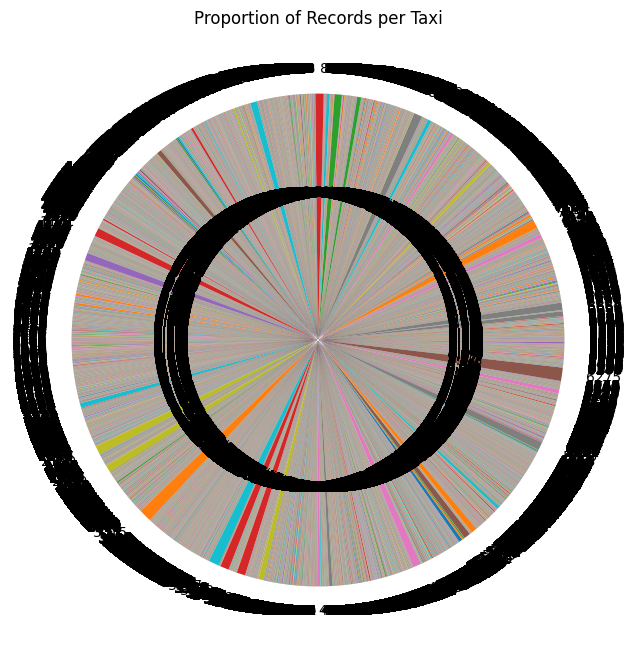

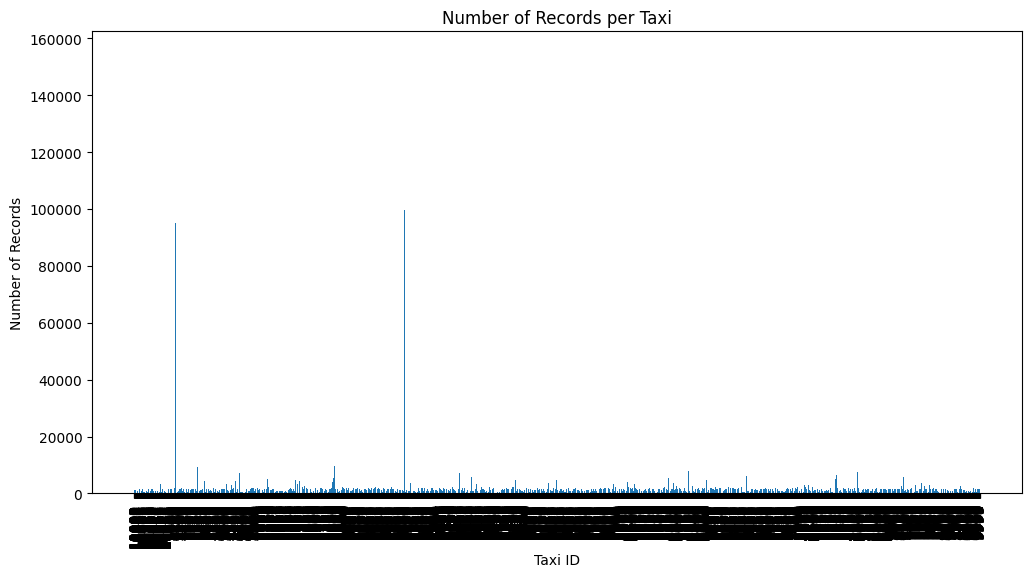

In [10]:
# Filter out empty DataFrames
non_empty_dfs = [df for df in df_list if not df.empty]

# Get taxi IDs and their record counts
taxi_ids = [df['taxiId'].iloc[0] for df in non_empty_dfs]
record_counts = [len(df) for df in non_empty_dfs]

# --- Pie Chart ---
plt.figure(figsize=(8, 8))
plt.pie(record_counts, labels=taxi_ids, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Records per Taxi')
plt.show()

# --- Bar Chart ---
plt.figure(figsize=(12, 6))
plt.bar([str(tid) for tid in taxi_ids], record_counts)
plt.xlabel('Taxi ID')
plt.ylabel('Number of Records')
plt.title('Number of Records per Taxi')
plt.xticks(rotation=90)
plt.show()

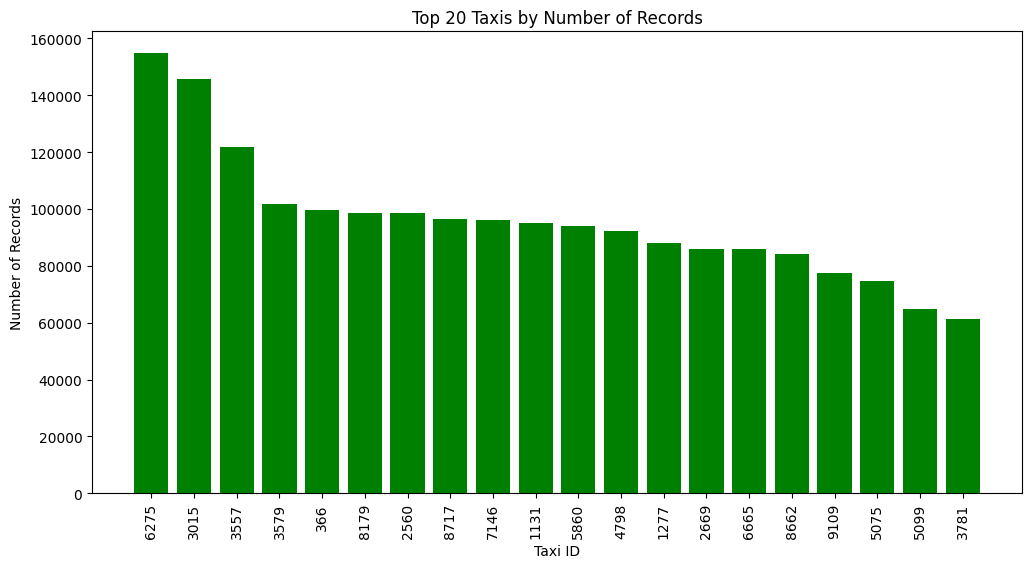

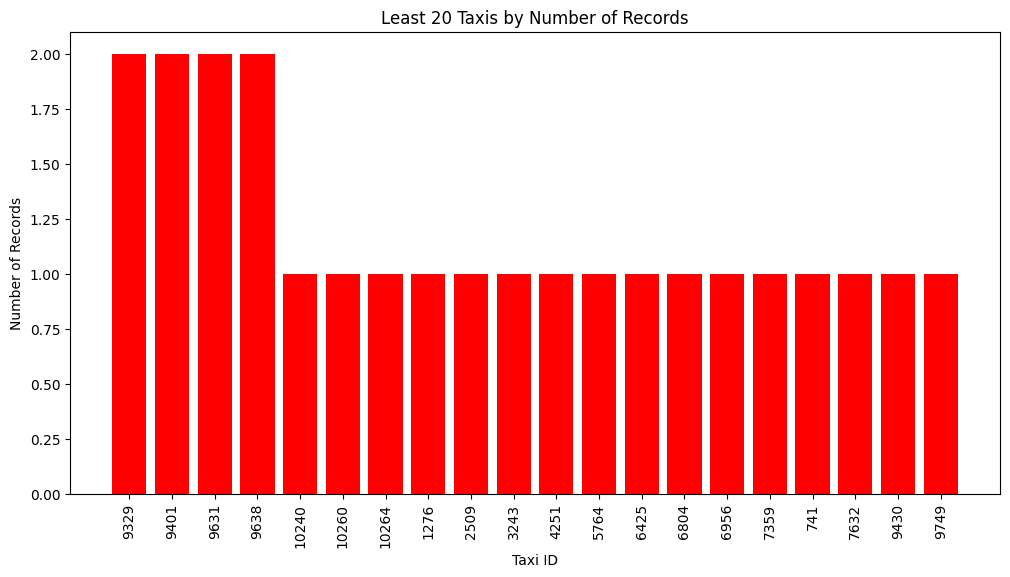

In [11]:
# Prepare data
taxi_record_counts = [(df['taxiId'].iloc[0], len(df)) for df in non_empty_dfs]
taxi_record_counts = sorted(taxi_record_counts, key=lambda x: x[1], reverse=True)

top_20 = taxi_record_counts[:20]
least_20 = taxi_record_counts[-20:] if len(taxi_record_counts) >= 20 else taxi_record_counts

# Top 20 plot
top_20_ids = [str(t[0]) for t in top_20]
top_20_counts = [t[1] for t in top_20]

plt.figure(figsize=(12, 6))
plt.bar(top_20_ids, top_20_counts, color='green')
plt.xlabel('Taxi ID')
plt.ylabel('Number of Records')
plt.title('Top 20 Taxis by Number of Records')
plt.xticks(rotation=90)
plt.show()

# Least 20 plot
least_20_ids = [str(t[0]) for t in least_20]
least_20_counts = [t[1] for t in least_20]

plt.figure(figsize=(12, 6))
plt.bar(least_20_ids, least_20_counts, color='red')
plt.xlabel('Taxi ID')
plt.ylabel('Number of Records')
plt.title('Least 20 Taxis by Number of Records')
plt.xticks(rotation=90)
plt.show()

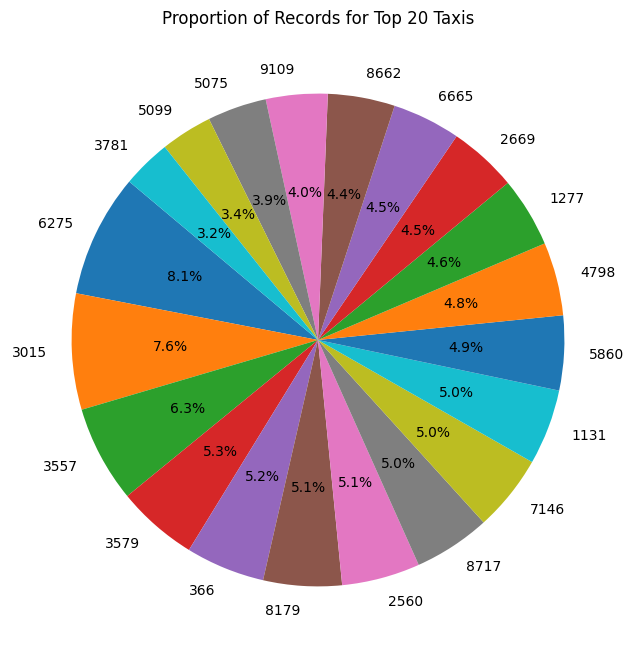

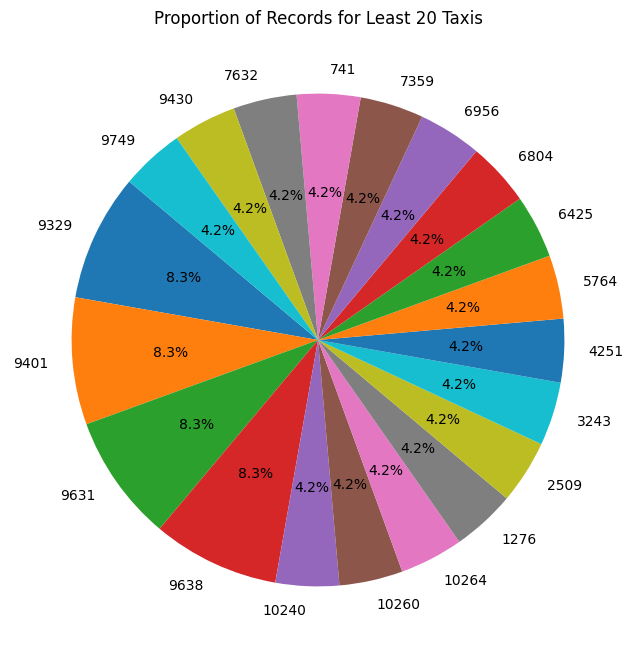

In [12]:
# Pie chart for Top 20 Taxis
plt.figure(figsize=(8, 8))
plt.pie(top_20_counts, labels=top_20_ids, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Records for Top 20 Taxis')
plt.show()

# Pie chart for Least 20 Taxis
plt.figure(figsize=(8, 8))
plt.pie(least_20_counts, labels=least_20_ids, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Records for Least 20 Taxis')
plt.show()

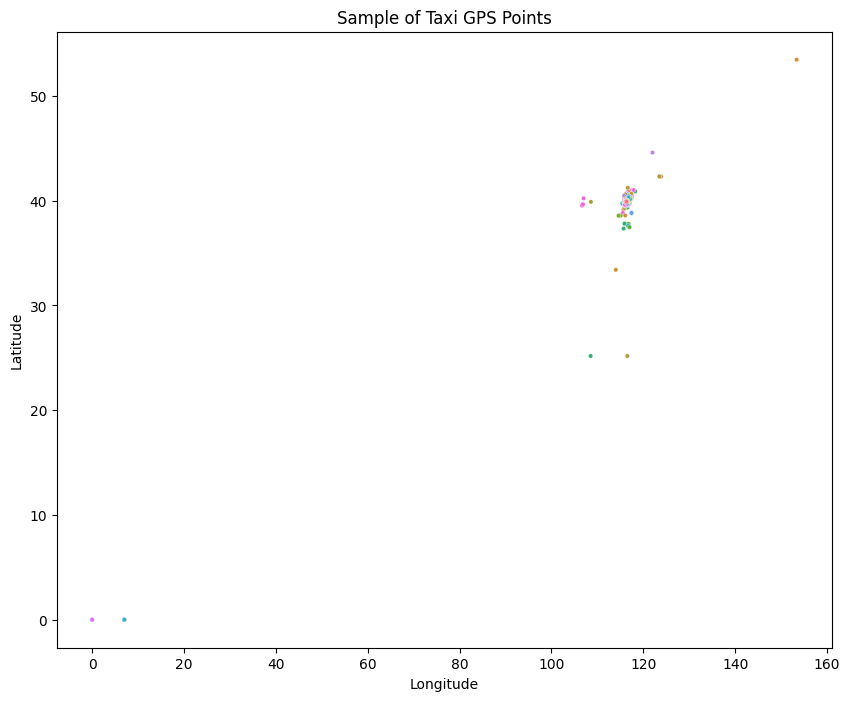

: 

In [ ]:
# Drop rows with missing values
#df.dropna(inplace=True)

# Taxi Route Scatter Plot ---
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', hue='taxiId', legend=False, s=10)
plt.title('Sample of Taxi GPS Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [ ]:
# --- Visualization 2: Heatmap of Taxi Density ---
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='longitude', y='latitude', fill=True, cmap='Reds', thresh=0.05)
plt.title('Taxi Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [ ]:
# --- Visualization 3: Number of Records per Taxi ---
taxi_counts = df['taxiId'].value_counts()
plt.figure(figsize=(12, 4))
sns.histplot(taxi_counts, bins=50, kde=True)
plt.title('Number of Records per Taxi')
plt.xlabel('Records per Taxi')
plt.ylabel('Number of Taxis')
plt.show()


In [ ]:

# --- Visualization 4: Time Series of Taxi Activity ---
df['hour'] = df['timestamp'].dt.hour
plt.figure(figsize=(12, 4))
sns.countplot(x='hour', data=df)
plt.title('Taxi Activity by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Records')
plt.show()


In [ ]:
# --- Outlier Detection ---
# Outliers in GPS coordinates (Beijing: 39-41 lat, 115-117 long)
outliers = df[(df['latitude'] < 39) | (df['latitude'] > 41) | (df['longitude'] < 115) | (df['longitude'] > 117)]
print(f"Number of GPS outliers: {len(outliers)}")
if not outliers.empty:
    print(outliers.head())

# Remove outliers for further analysis
df_clean = df[(df['latitude'] >= 39) & (df['latitude'] <= 41) & (df['longitude'] >= 115) & (df['longitude'] <= 117)]



In [ ]:
# --- Business Inferences ---
print("\n--- Business Inferences ---")
print(f"Total taxis: {df_clean['taxiId'].nunique()}")
print(f"Total records: {len(df_clean)}")
print("Peak hours (most taxi activity):")
print(df_clean['hour'].value_counts().sort_index().tail(10))

#Identify most popular pickup areas (top 5 densest grid cells)
df_clean['lon_bin'] = pd.cut(df_clean['longitude'], bins=20)
df_clean['lat_bin'] = pd.cut(df_clean['latitude'], bins=20)
popular_areas = df_clean.groupby(['lon_bin', 'lat_bin']).size().sort_values(ascending=False).head(5)
print("\nTop 5 most popular areas (by GPS grid cell):")
print(popular_areas)

df_clean.to_csv('cleaned_taxi_data.csv', index=False)